In [12]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
working_data = pd.read_csv('working_data_file.csv')
working_data.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_revenue,net_revenue,ROI,genres,averagerating,runtime_minutes
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904,732.200683,Horror,6.1,93.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750,213.377435,"Action,Adventure,Fantasy",6.6,136.0
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300,-44.992943,"Action,Adventure,Sci-Fi",6.0,113.0
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831,463.224389,"Action,Adventure,Sci-Fi",7.3,141.0
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2726949682,2426949682,808.983227,"Action,Adventure,Sci-Fi",8.5,149.0


In [14]:
min_rating = working_data['averagerating'].min()
max_rating = working_data['averagerating'].max()

print(f"Smallest rating: {min_rating}")
print(f"Largest rating: {max_rating}")

Smallest rating: 1.6
Largest rating: 9.2


In [15]:
correlation_matrix = working_data[['averagerating', 'total_revenue']].corr(method='pearson')
pearson_corr = correlation_matrix.loc['averagerating', 'total_revenue']

# Print result
print("Pearson Correlation Coefficient between Rating and Box Office Revenue:", pearson_corr)

Pearson Correlation Coefficient between Rating and Box Office Revenue: 0.1843955160890018


In [16]:
# Step 1: Extract unique genres
unique_genres = set(
    genre.strip() for genres_list in working_data['genres'].dropna() for genre in genres_list.split(',')
)

# Step 2: Create a new DataFrame to hold individual genre entries
expanded_genre_data = []

for _, row in working_data.iterrows():
    for genre in row['genres'].split(','):
        genre = genre.strip()
        expanded_genre_data.append({
            'id': row['id'],
            'movie': row['movie'],
            'genre': genre,
            'averagerating': row['averagerating'],
            'domestic_gross': row['domestic_gross'],
            'worldwide_gross': row['worldwide_gross'],
            'production_budget': row['production_budget'],
            'net_revenue': row['net_revenue'],
            'ROI': row['ROI'],
            'runtime_minutes': row['runtime_minutes']
        })

# Convert to a new DataFrame
expanded_working_data = pd.DataFrame(expanded_genre_data)
expanded_working_data.to_csv('expanded_working_data', index=False)


In [17]:
avatar_data = expanded_working_data[expanded_working_data['movie'] == 'Pirates of the Caribbean: On Stranger Tides']
avatar_data.head()

,id,movie,genre,averagerating,domestic_gross,worldwide_gross,production_budget,net_revenue,ROI,runtime_minutes
1,2,Pirates of the Caribbean: On Stranger Tides,Action,6.6,241063875,1045663875,410600000,876127750,213.377435,136.0
2,2,Pirates of the Caribbean: On Stranger Tides,Adventure,6.6,241063875,1045663875,410600000,876127750,213.377435,136.0
3,2,Pirates of the Caribbean: On Stranger Tides,Fantasy,6.6,241063875,1045663875,410600000,876127750,213.377435,136.0


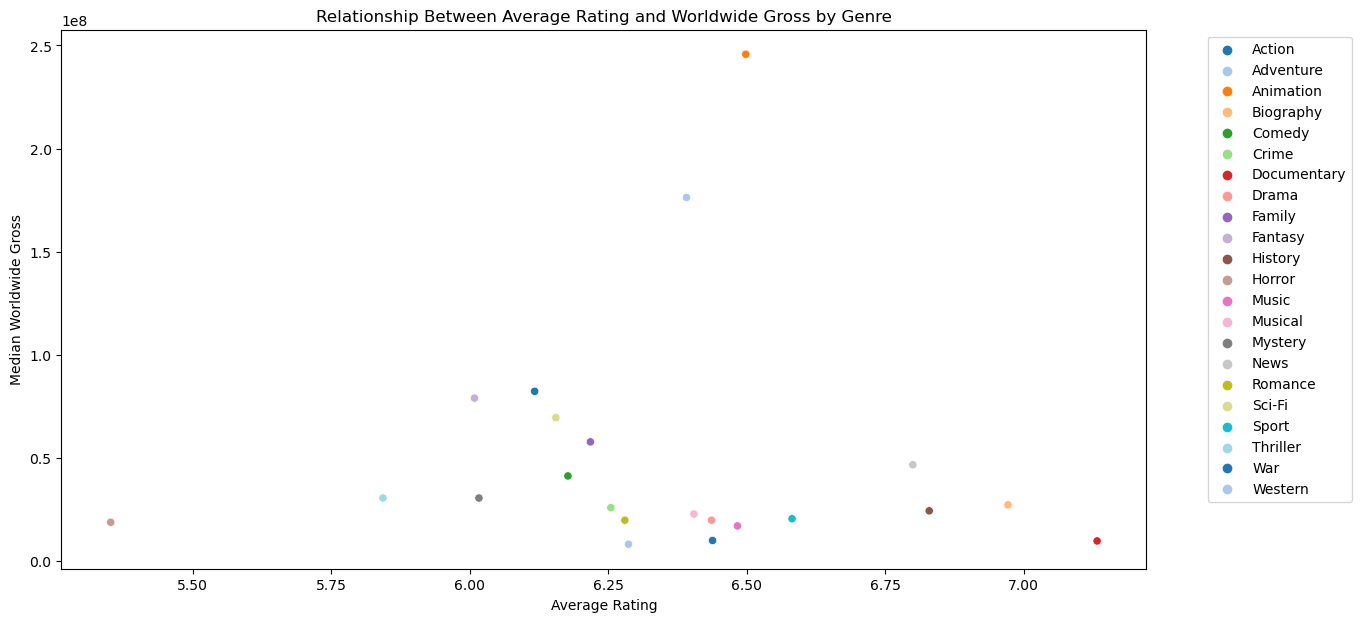

In [18]:
genre_stats = expanded_working_data.groupby('genre').agg({
    'averagerating': 'mean',
    'domestic_gross': 'median',
    'worldwide_gross': 'median'
}).reset_index()

# Step 4: Visualize the average rating vs. box office performance
plt.figure(figsize=(14, 7))
sns.scatterplot(data=genre_stats, x='averagerating', y='worldwide_gross', hue='genre', palette='tab20')
plt.title('Relationship Between Average Rating and Worldwide Gross by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Median Worldwide Gross')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


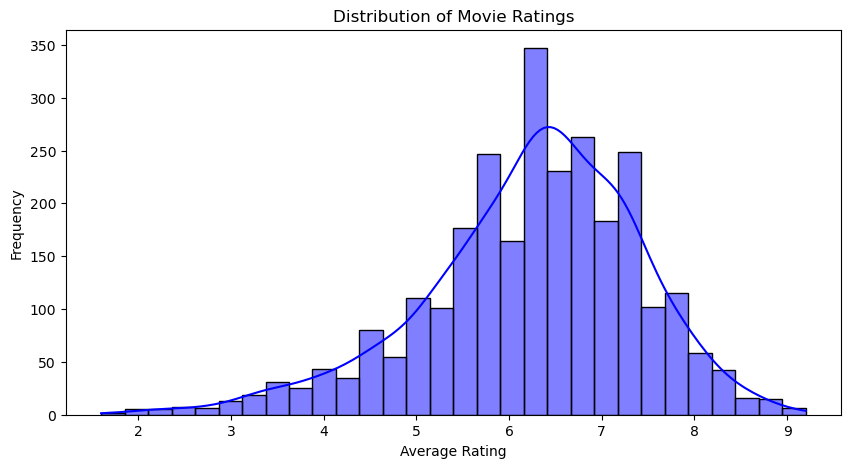

In [19]:
# Distribution of Ratings
plt.figure(figsize=(10, 5))
sns.histplot(working_data['averagerating'], kde=True, bins=30, color='blue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

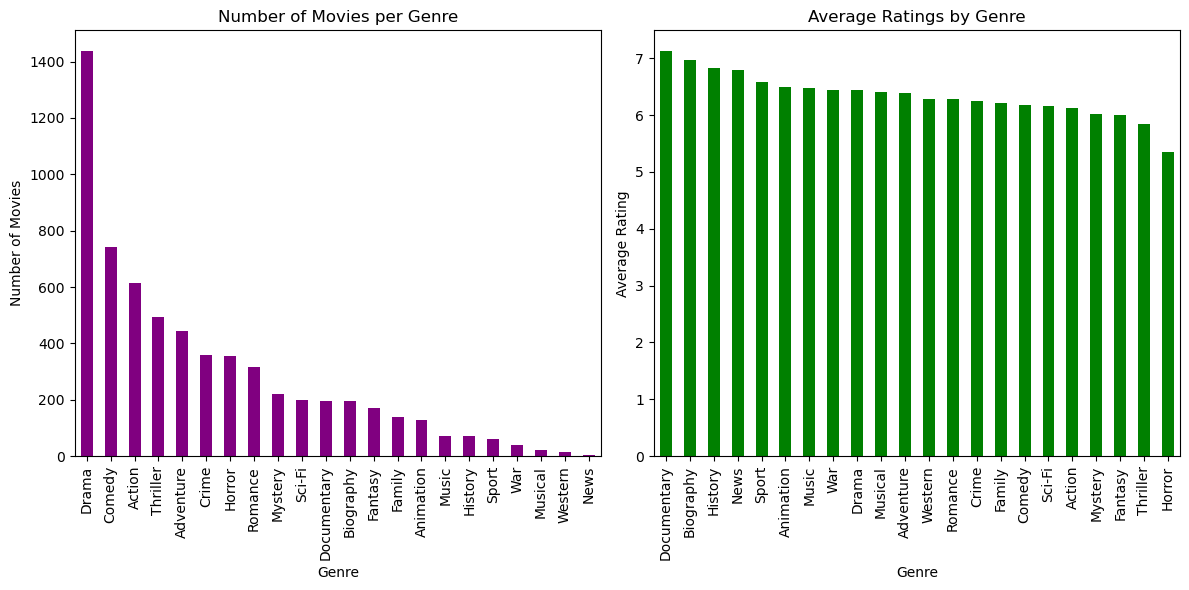

In [20]:
# Genre Breakdown: Number of Movies and Average Ratings
genre_count = expanded_working_data['genre'].value_counts()
average_ratings_by_genre = expanded_working_data.groupby('genre')['averagerating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax1 = plt.subplot(1, 2, 1)
genre_count.plot(kind='bar', color='purple', ax=ax1)
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')

ax2 = plt.subplot(1, 2, 2)
average_ratings_by_genre.plot(kind='bar', color='green', ax=ax2)
plt.title('Average Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')

plt.tight_layout()
plt.show()


c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


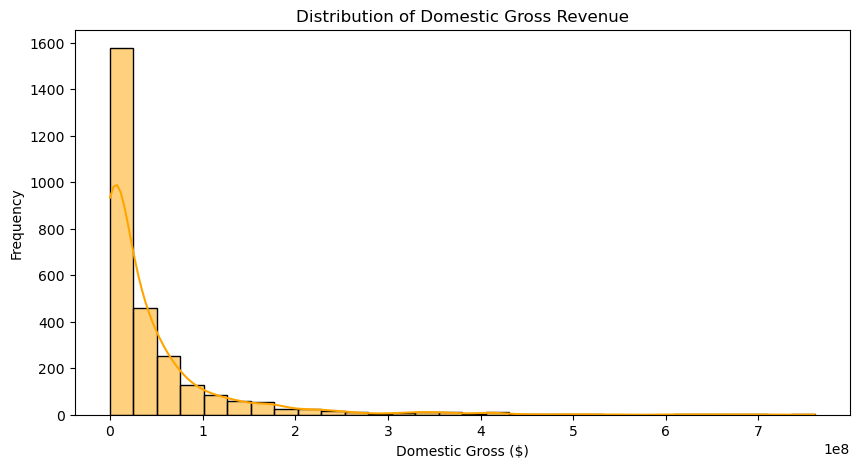

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


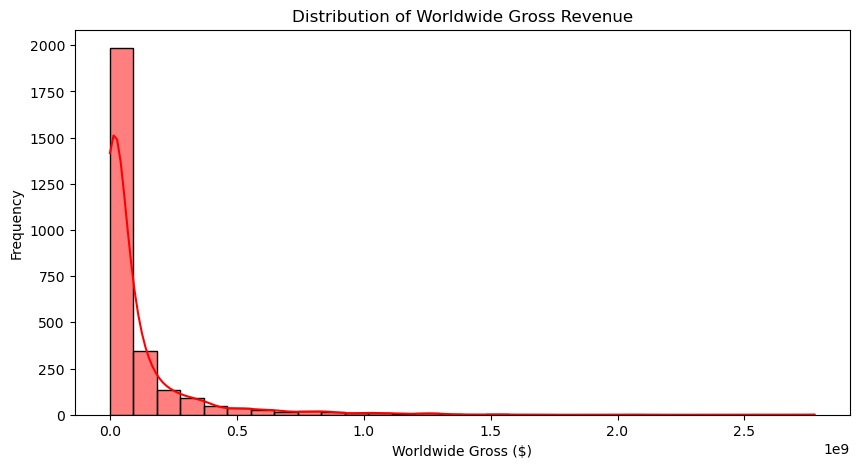

In [21]:
# Revenue Statistics: Distribution of Domestic and Worldwide Gross
plt.figure(figsize=(10, 5))
sns.histplot(working_data['domestic_gross'], kde=True, bins=30, color='orange')
plt.title('Distribution of Domestic Gross Revenue')
plt.xlabel('Domestic Gross ($)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(working_data['worldwide_gross'], kde=True, bins=30, color='red')
plt.title('Distribution of Worldwide Gross Revenue')
plt.xlabel('Worldwide Gross ($)')
plt.ylabel('Frequency')
plt.show()


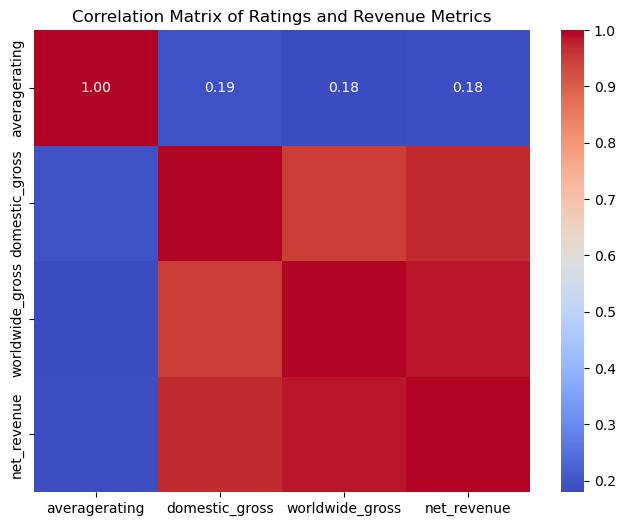

In [22]:
# Correlation Matrix
correlation_matrix = working_data[['averagerating', 'domestic_gross', 'worldwide_gross', 'net_revenue']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Ratings and Revenue Metrics')
plt.show()

In [23]:
from scipy.stats import pearsonr, spearmanr

# Create a DataFrame to store correlation results
correlation_results = []

# Iterate over each unique genre to calculate correlation
for genre in unique_genres:
    genre_data = expanded_working_data[expanded_working_data['genre'] == genre]
    if len(genre_data) > 1:  # Ensure enough data for statistical analysis
        pearson_corr, _ = pearsonr(genre_data['averagerating'], genre_data['worldwide_gross'])
        spearman_corr, _ = spearmanr(genre_data['averagerating'], genre_data['worldwide_gross'])
        correlation_results.append({
            'genre': genre,
            'pearson_correlation': pearson_corr,
            'spearman_correlation': spearman_corr
        })

correlation_df = pd.DataFrame(correlation_results)
print("Correlation Analysis Results:")
print(correlation_df)


Correlation Analysis Results:
          genre  pearson_correlation  spearman_correlation
0       Western             0.669155              0.544807
1         Drama             0.119698              0.236852
2       Fantasy             0.369987              0.334969
3         Crime             0.135310              0.235934
4        Comedy             0.240233              0.211253
5       History             0.286847              0.315821
6        Family             0.321893              0.259144
7       Musical             0.216731              0.254238
8         Music             0.097740             -0.018756
9     Animation             0.396942              0.404541
10        Sport            -0.057446              0.051092
11         News            -0.699698             -0.866025
12          War             0.161726              0.313093
13      Romance            -0.059272              0.030096
14    Biography             0.372178              0.421360
15       Action           

In [24]:
from scipy.stats import f_oneway

anova_results = []

for genre in unique_genres:
    genre_data = expanded_working_data[expanded_working_data['genre'] == genre]
    if len(genre_data) > 1:
        # Create two groups: high ratings and low ratings based on median split
        high_rating_group = genre_data[genre_data['averagerating'] > genre_data['averagerating'].median()]['domestic_gross']
        low_rating_group = genre_data[genre_data['averagerating'] <= genre_data['averagerating'].median()]['domestic_gross']
        
        # Perform ANOVA
        anova_result = f_oneway(high_rating_group, low_rating_group)
        anova_results.append({
            'genre': genre,
            'anova_p_value': anova_result.pvalue
        })

anova_df = pd.DataFrame(anova_results)
print("ANOVA Results by Genre:")
print(anova_df)


ANOVA Results by Genre:
          genre  anova_p_value
0       Western   2.211580e-01
1         Drama   1.956280e-04
2       Fantasy   6.917836e-05
3         Crime   1.081803e-03
4        Comedy   1.681751e-06
5       History   6.425724e-04
6        Family   1.270506e-03
7       Musical   5.398301e-02
8         Music   3.218118e-01
9     Animation   2.669369e-04
10        Sport   6.698530e-01
11         News            NaN
12          War   4.024711e-01
13      Romance   7.378017e-01
14    Biography   4.951261e-08
15       Action   4.014389e-18
16  Documentary   3.157926e-01
17     Thriller   6.811070e-11
18    Adventure   3.101051e-13
19      Mystery   2.261815e-04
20       Horror   6.936869e-05
21       Sci-Fi   1.951069e-08


c:\Users\User\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


In [25]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# List of genres to perform regression analysis on
selected_genres = ['Action', 'Drama', 'Comedy']  # You can customize this list

for genre in selected_genres:
    genre_data = expanded_working_data[expanded_working_data['genre'] == genre]
    if len(genre_data) > 1:
        # Define the regression formula
        model = ols('worldwide_gross ~ averagerating', data=genre_data).fit()
        
        # Print the regression summary
        print(f"Regression Analysis for {genre}:")
        print(model.summary())


Regression Analysis for Action:
                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     117.2
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           4.11e-25
Time:                        18:24:23   Log-Likelihood:                -12742.
No. Observations:                 613   AIC:                         2.549e+04
Df Residuals:                     611   BIC:                         2.550e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     

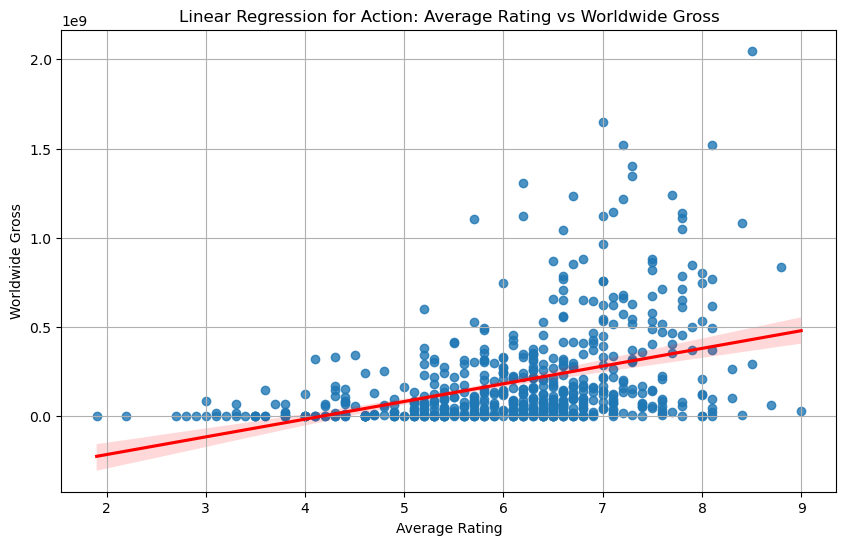

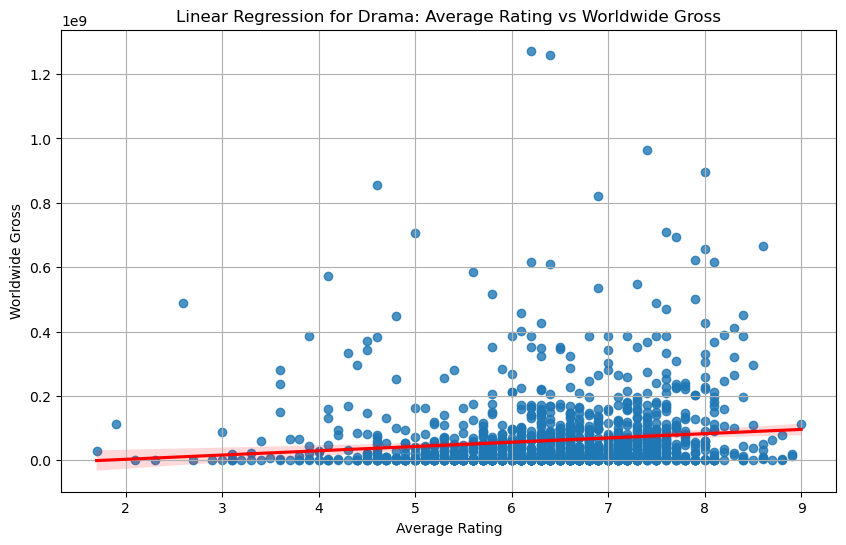

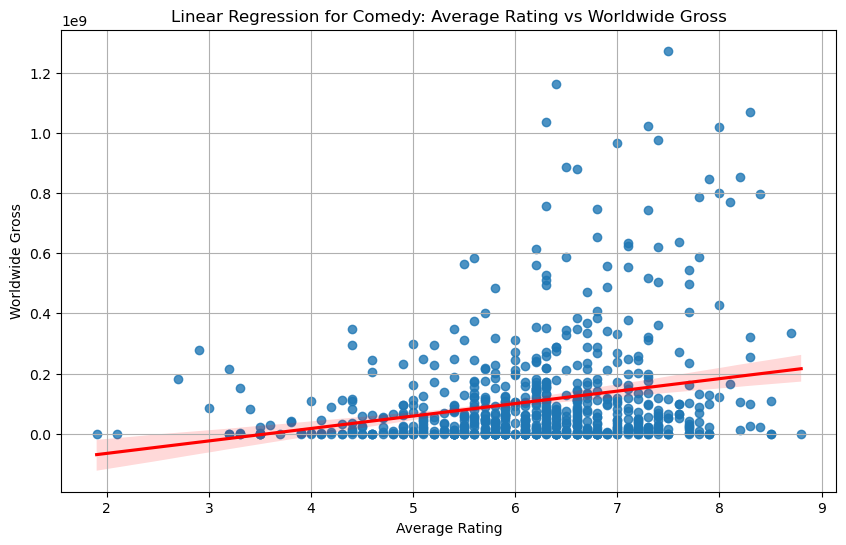

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the linear regression for each genre
for genre in selected_genres:
    genre_data = expanded_working_data[expanded_working_data['genre'] == genre]
    if len(genre_data) > 1:
        plt.figure(figsize=(10, 6))
        
        # Plot with seaborn regplot
        sns.regplot(x='averagerating', y='worldwide_gross', data=genre_data, line_kws={"color": "red"})
        
        plt.title(f'Linear Regression for {genre}: Average Rating vs Worldwide Gross')
        plt.xlabel('Average Rating')
        plt.ylabel('Worldwide Gross')
        plt.grid(True)
        plt.show()
